In [27]:
%matplotlib inline
import math

import numpy as np
import scipy

import matplotlib.pyplot as plt

import ee
import pandas

import seaborn as sns
sns.set()

import datashader as ds
import datashader.transfer_functions as tf

from datashader import reductions
import bokeh.palettes as p
import colorcet as c


import holoviews as hv
import holoviews.plotting.mpl
hv.notebook_extension()

In [2]:
ee.Initialize()

INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token


In [3]:
λ = [426.8200, 436.9900, 447.1700, 457.3400, 467.5200, 477.6900, 487.8700, 498.0400, 508.2200, 518.3900, 528.5700, 538.7400, 
548.9200, 559.0900, 569.2700, 579.4500, 589.6200, 599.8000, 609.9700, 620.1500, 630.3200, 640.5000, 650.6700, 660.8500, 
671.0200, 681.2000, 691.3700, 701.5500, 711.7200, 721.9000, 732.0700, 742.2500, 752.4300, 762.6000, 772.7800, 782.9500, 
793.1300, 803.3000, 813.4800, 823.6500, 833.8300, 844.0000, 854.1800, 864.3500, 874.5300, 884.7000, 894.8800, 905.0500, 
915.2300, 925.4100, 912.4500, 922.5400, 932.6400, 942.7300, 952.8200, 962.9100, 972.9900, 983.0800, 993.1700, 1003.300,
1013.300, 1023.400,1033.490,1043.590, 1053.690, 1063.790, 1073.890, 1083.990, 1094.090, 1104.190, 1114.190, 1124.280,
1134.3800, 1144.4800, 1154.5800, 1164.6800, 1174.7700, 1184.8700, 1194.9700, 1205.0700, 1215.1700, 1225.1700, 1235.2700, 
1245.3600, 1255.4600, 1265.5600, 1275.6600, 1285.7600, 1295.8600, 1305.9600, 1316.0500, 1326.0500, 1336.1500, 1346.2500, 
1356.3500, 1366.4500, 1376.5500, 1386.6500, 1396.7400, 1406.8400, 1416.9400, 1426.9400, 1437.0400, 1447.1400, 1457.2300, 
1467.3300, 1477.4300, 1487.5300, 1497.6300, 1507.7300, 1517.8300, 1527.9200, 1537.9200, 1548.0200, 1558.1200, 1568.2200, 
1578.3200, 1588.4200, 1598.5100, 1608.6100, 1618.7100, 1628.8100, 1638.8100, 1648.9000, 1659.0000, 1669.1000, 1679.2000, 
1689.3000, 1699.4000, 1709.5000, 1719.6000, 1729.7000, 1739.7000, 1749.7900, 1759.8900, 1769.9900, 1780.0900, 1790.1900, 
1800.2900, 1810.3800, 1820.4800, 1830.5800, 1840.5800, 1850.6800, 1860.7800, 1870.8700, 1880.9800, 1891.0700, 1901.1700, 
1911.2700, 1921.3700, 1931.4700, 1941.5700, 1951.5700, 1961.6600, 1971.7600, 1981.8600, 1991.9600, 2002.0600, 2012.1500, 
2022.2500, 2032.3500, 2042.4500, 2052.4500, 2062.5500, 2072.6500, 2082.7500, 2092.8400, 2102.9400, 2113.0400, 2123.1400, 
2133.2400, 2143.3400, 2153.3400, 2163.4300, 2173.5300, 2183.6300, 2193.7300, 2203.8300, 2213.9300, 2224.0300, 2234.1200, 
2244.2200, 2254.2200, 2264.3200, 2274.4200, 2284.5200, 2294.6100, 2304.7100, 2314.8100, 2324.9100, 2335.0100, 2345.1100, 
2355.2100, 2365.2000, 2375.3000, 2385.4000, 2395.5000]

In [4]:
irradiances = [1650.52,1714.9,1994.52,2034.72,1970.12,2036.22,1860.24,1953.29,1953.55,1804.56,1905.51,1877.5,1883.51,1821.99,1841.92,1847.51,1779.99,1761.45,1740.8,1708.88,1672.09,1632.83,1591.92,1557.66,1525.41,1470.93,1450.37,1393.18,1372.75,
1235.63,1266.13,1279.02,1265.22,1235.37,1202.29,1194.08,1143.6,1128.16,1108.48,1068.5,1039.7,1023.84,938.96,949.97,949.74,929.54,917.32,892.69,877.59,834.6,876.1,839.34,841.54,810.2,802.22,784.44,772.22,758.6,743.88,721.76,
714.26,698.69,682.41,669.61,657.86,643.48,623.13,603.89,582.63,579.58,571.8,562.3,551.4,540.52,534.17,519.74,511.29,497.28,492.82,479.41,479.56,469.01,461.6,451,444.06,435.25,429.29,415.69,412.87,405.4,396.94,391.94,386.79,
380.65,370.96,365.57,358.42,355.18,349.04,342.1,336,325.94,325.71,318.27,312.12,308.08,300.52,292.27,293.28,282.14,285.6,280.41,275.87,271.97,265.73,260.2,251.62,244.11,247.83,242.85,238.15,239.29,227.38,226.69,225.48,218.69,
209.07,210.62,206.98,201.59,198.09,191.77,184.02,184.91,182.75,180.09,175.18,173,168.87,165.19,156.3,159.01,155.22,152.62,149.14,141.63,139.43,139.22,137.97,136.73,133.96,130.29,124.5,124.75,123.92,121.95,118.96,117.78,
115.56,114.52,111.65,109.21,107.69,106.13,103.7,102.42,100.42,98.27,97.37,95.44,93.55,92.35,90.93,89.37,84.64,85.47,84.49,83.43,81.62,80.67,79.32,78.11,76.69,75.35,74.15,73.25,71.67,70.13,69.52,68.28,66.39,65.76,65.23,63.09,62.9,
61.68,60,59.94]


https://code.earthengine.google.com/b498da9137550be29558fd1620b64d14

In [5]:
def to_radiance(image):
    kVNIR = ee.List.repeat(40, 57-8+1)
    kSWIR = ee.List.repeat(80, 224-77+1)
    k = kVNIR.cat(kSWIR)
  
    return image.toFloat() \
        .divide(ee.Image.constant(k).rename(image.bandNames())) \
        .set('system:time_start', image.get('system:time_start')) \
        .copyProperties(image)

In [6]:
def to_reflectance(image):
    # calculate day of year from time stamp
    date = ee.Date(image.get('system:time_start'));
    jan01 = ee.Date.fromYMD(date.get('year'), 1, 1);
    doy = date.difference(jan01,'day').add(1);

    # Earth-Sun distance squared (d2) 
    # http://physics.stackexchange.com/questions/177949/earth-sun-distance-on-a-given-day-of-the-year
    d = ee.Number(doy).subtract(4).multiply(0.017202).cos().multiply(-0.01672).add(1) 
    
    d2 = d.multiply(d)  
    
    # mean exoatmospheric solar irradiance (ESUN)
    # https://eo1.usgs.gov/faq/question?id=21
    ESUN = irradiances
    
    # cosine of solar zenith angle (cosz)
    solar_z = ee.Number(ee.Number(90).subtract(image.get('SUN_ELEVATION')))
    cosz = solar_z.multiply(math.pi).divide(180).cos()

    # calculate reflectance
    scalarFactors = ee.Number(math.pi).multiply(d2).divide(cosz)
    scalarApplied = ee.Image(image).toFloat().multiply(scalarFactors)
    reflectance = scalarApplied.divide(ESUN)

    return reflectance \
        .set('system:time_start', image.get('system:time_start')) \
        .copyProperties(image)


In [7]:
aoi = ee.Geometry.Polygon([[[1.0418128967285156, 44.09780780797632],
                            [1.0212135314941406, 44.079559683327744],
                            [1.0287666320800781, 44.074256807867265],
                            [1.0474777221679688, 44.09225998735069]]]);

In [8]:
aoi = ee.Geometry.Point([1.153564453125,43.70157484580675]).buffer(600) # France


In [9]:
aoi = ee.Geometry.LineString([[1.0256767272949219, 44.09275314803795], [1.0474777221679688, 44.082149286997534]]).bounds()

In [10]:
bands = ['B018', 'B024', 'B050', 'B054']

images = ee.ImageCollection('EO1/HYPERION')

images = images.filterBounds(aoi) \
    .map(to_radiance) \
    .map(to_reflectance) \
    .select(bands)

response = images.getRegion(aoi, 30).getInfo()
header = response[0] # extract the header column names
data = np.transpose(np.array(response[1:])) # create a Numpy array of the data
    
df = pandas.DataFrame(np.transpose(data[1:].astype(float)), columns=header[1:])

In [11]:
len(df)

184680

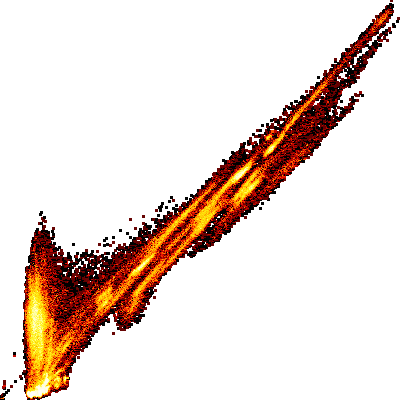

In [12]:
canvas = ds.Canvas(plot_width=400, plot_height=400)


# reduction = reductions.std(bands[0])
reduction = reductions.count()

agg = canvas.points(df, 'B018', 'B054', agg=reduction)

agg = tf.shade(agg, cmap=c.fire, alpha=250, how='eq_hist')


tf.spread(agg)

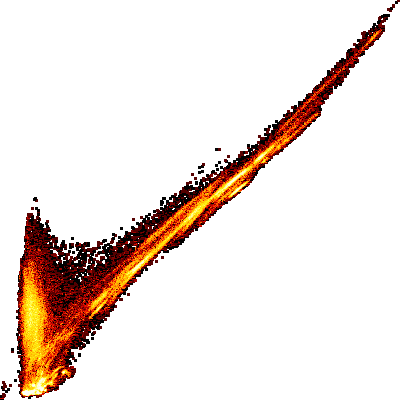

In [13]:
canvas = ds.Canvas(plot_width=400, plot_height=400)


# reduction = reductions.std(bands[0])
reduction = reductions.count()

agg = canvas.points(df, 'B024', 'B050', agg=reduction)

agg = tf.shade(agg, cmap=c.fire, alpha=250, how='eq_hist')

tf.spread(agg)


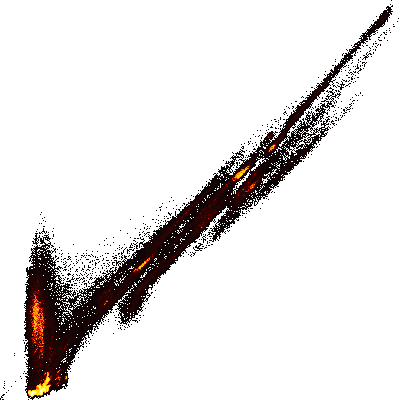

In [14]:
canvas = ds.Canvas(plot_width=400, plot_height=400)


# reduction = reductions.std(bands[0])
reduction = reductions.count()

agg = canvas.points(df, 'B018', 'B054', agg=reduction)

#agg = tf.shade(agg, cmap=c.fire, alpha=250, how='linear')

img1 = tf.shade(agg, cmap=c.fire, alpha=250, how='linear')
s1 = img1 #tf.spread(img1, px=1, shape='circle')

img2 = tf.shade(agg.where(agg>=np.percentile(agg,99.2)), cmap=p.RdGy11, alpha=99)
img2 = tf.shade(agg.where(agg>=np.percentile(agg,99.2)), cmap=c.fire, alpha=255, how='eq_hist')
s2 = img2 # tf.spread(img2, px=2, shape='square', how='over')

tf.stack(s1, s2)



In [15]:
# chart for figure
image_area = ee.Geometry.LineString([[-122.1884822845459, 37.39590290677035], 
                                     [-122.17977046966553, 37.387753892497166]]).bounds()

# small lake somewhere in California
aoi = ee.Geometry.Point([-122.18461990356445,37.39208423213654]) #.buffer(90)

In [16]:
images = ee.ImageCollection('EO1/HYPERION')

def add_date(i):
    return i.set('DATE', i.date().format('YYYY-MM-dd'))

def add_all_nonzero(i):
    v = i.select(0).mask().reduceRegion(ee.Reducer.allNonZero(), image_area).values().get(0)
    
    return i.set('all_nonzero', v)

images = images \
    .filterBounds(aoi) \
    .map(add_all_nonzero).filter(ee.Filter.eq('all_nonzero', 1)) \
    .map(add_date).filter(ee.Filter.neq('DATE', '2002-04-26')) \
    .map(to_radiance) \

print(images.size().getInfo())    
    
    
response = images.getRegion(aoi, 30).getInfo()
header = response[0] # extract the header column names
data = np.transpose(np.array(response[1:])) # create a Numpy array of the data
    
df_radiance = pandas.DataFrame(np.transpose(data[1:].astype(float)), columns=header[1:])

24


In [17]:
images = images.map(to_reflectance)

response = images.getRegion(aoi, 30).getInfo()
header = response[0] # extract the header column names
data = np.transpose(np.array(response[1:])) # create a Numpy array of the data

df_reflectance = pandas.DataFrame(np.transpose(data[1:].astype(float)), columns=header[1:])

In [18]:
# re-arrange badly ordered columns

c = df_reflectance.columns.tolist()
c[:51] + c[53:54] + c[51:52] + c[54:55] + c[55:56] + c[52:53] + c[56:]

df_reflectance = df_reflectance[c]
df_radiance = df_radiance[c]

In [19]:
m_radiance = df_radiance.as_matrix()
m_reflectance = df_reflectance.as_matrix()

In [20]:
λ.sort()

In [21]:
#palette = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
#sns.set_palette(palette)

palette = sns.color_palette("hls", 25)
sns.palplot(palette)
sns.set_palette(palette)

In [22]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]

# print(font_names)

mpl.rcParams['font.family'] = 'Arial'

In [23]:
sns.set_style('white')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


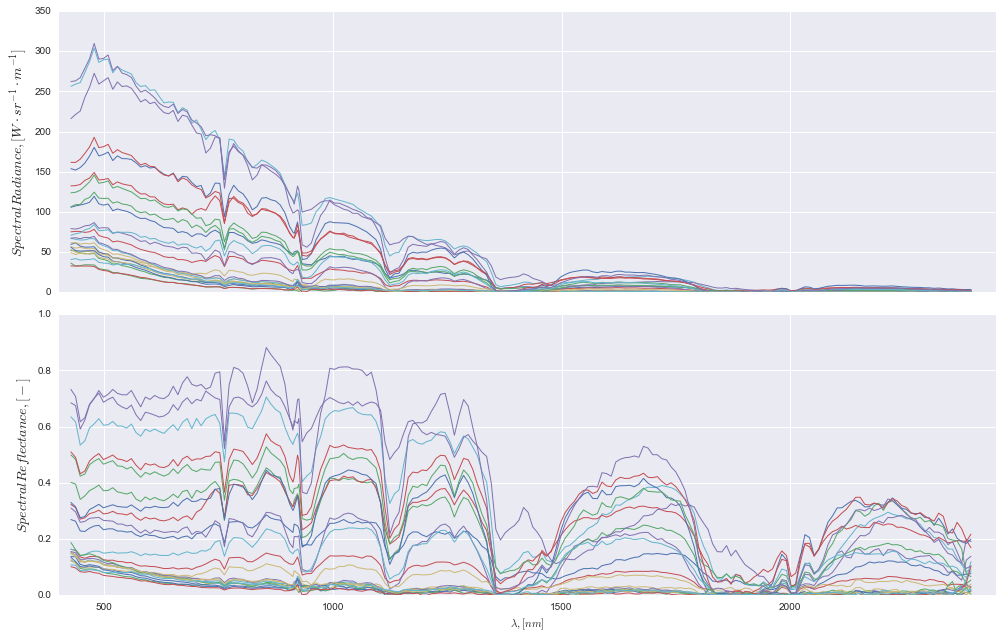

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9), dpi=300)

for i in range(len(m_radiance)):
    ax1.plot(λ, m_radiance[i, 3:], lw=1, alpha=1)
    ax2.plot(λ, m_reflectance[i, 3:], lw=1, alpha=1)
    
ax2.set_ylim(0, 1)    
ax1.set_xlim(400, 2450)
ax2.set_xlim(400, 2450)
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel(r'$Spectral Radiance, [W \cdot sr^{-1} \cdot m^{-1}]$', fontsize=14)
ax2.set_ylabel(r'$Spectral Reflectance, [-]$', fontsize=14)
ax2.set_xlabel(r'$\lambda, [nm]$')

f.tight_layout()

f.show()
#vals = ax2.get_yticks()
#ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

In [31]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages(r'..\figures\hyperion-signatures.pdf')
pdf.savefig(figure=f, bbox_inches='tight')
pdf.close()
